# Spread Model (Scaled Features)

Scaling features can be important because it ensures that all features contribute equally to the model, preventing features with larger scales from dominatining the learning process. By scaling, the models overall efficiency is enhanced. 

It is important to note that not all machine learning models require feature scaling. The models that I train and evaluate below are models that do require feature scaling.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Sklearn Model packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('/Users/epainter/Desktop/bet_model_v2/data/processing/fc_3.csv')

df.head()

,spread,ou_value,fav_ml_result,fav_sp_result,ou_result,fav_ppg,und_ppg,fav_papg,und_papg,fav_ypg,und_ypg,fav_yapg,und_yapg,fav_topg,und_topg,fav_tofpg,und_tofpg,fav_avg_mov,und_avg_mov,fav_win_pct,und_win_pct,fav_last_5_win_pct,und_last_5_win_pct,fav_home_win_pct,und_home_win_pct,fav_away_win_pct,und_away_win_pct,ppg_diff,ypg_diff,topg_diff,avg_mov_diff,win_pct_diff,last_5_win_pct_diff,team_ovr_diff,ypg_sum,ppg_ratio,ypg_ratio,avg_mov_ratio
0,-9.5,53.5,1,1.0,1,34.0,20.0,20.0,34.0,369.0,360.0,360.0,369.0,0.0,1.0,1.0,0.0,14.0,-14.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,14.0,9.0,-1.0,28.0,1.0,1.0,5.35,729.0,1.70,1.02,-1.0
1,-1.0,49.5,0,0.0,1,25.0,38.0,38.0,25.0,506.0,383.0,383.0,506.0,2.0,0.0,0.0,2.0,-13.0,13.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-13.0,123.0,2.0,-26.0,-1.0,-1.0,-1.00,889.0,0.66,1.32,-1.0
2,-7.0,47.0,1,1.0,0,38.0,6.0,6.0,38.0,381.0,306.0,306.0,381.0,1.0,3.0,3.0,1.0,32.0,-32.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,32.0,75.0,-2.0,64.0,1.0,1.0,4.31,687.0,6.33,1.25,-1.0
3,-6.5,39.5,1,1.0,1,27.0,17.0,17.0,27.0,404.0,254.0,254.0,404.0,2.0,2.0,2.0,2.0,10.0,-10.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,10.0,150.0,0.0,20.0,1.0,1.0,-10.92,658.0,1.59,1.59,-1.0
4,-3.0,48.0,1,1.0,1,34.0,30.0,30.0,34.0,372.0,388.0,388.0,372.0,0.0,0.0,0.0,0.0,4.0,-4.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,-16.0,0.0,8.0,1.0,1.0,-0.89,760.0,1.13,0.96,-1.0


Here I am dropping the columns that show the result of a game, as we obviously do not want the results of a game to have an effect on our models learning process.

In [4]:
df.drop(columns=['avg_mov_ratio', 'fav_sp_result', 'ou_result'], inplace=True)

In [5]:
df.describe()

,spread,ou_value,fav_ml_result,fav_ppg,und_ppg,fav_papg,und_papg,fav_ypg,und_ypg,fav_yapg,und_yapg,fav_topg,und_topg,fav_tofpg,und_tofpg,fav_avg_mov,und_avg_mov,fav_win_pct,und_win_pct,fav_last_5_win_pct,und_last_5_win_pct,fav_home_win_pct,und_home_win_pct,fav_away_win_pct,und_away_win_pct,ppg_diff,ypg_diff,topg_diff,avg_mov_diff,win_pct_diff,last_5_win_pct_diff,team_ovr_diff,ypg_sum,ppg_ratio,ypg_ratio
count,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,-5.305322,45.297386,0.660131,24.761148,21.200710,22.014472,23.962446,361.164659,332.710411,339.669402,354.303940,1.255275,1.342502,1.387348,1.214678,2.891298,-2.899197,0.586797,0.413931,0.589897,0.409589,0.574715,0.416275,0.550682,0.374052,3.560439,28.454248,-0.087227,5.790495,0.172866,0.180308,3.199589,693.875070,1.232661,1.101718
std,3.499087,4.672252,0.473886,5.281672,4.916604,4.954943,4.672909,44.999518,44.421907,46.045253,41.795514,0.540782,0.510628,0.545258,0.524967,9.237082,8.847268,0.238532,0.249736,0.272655,0.284087,0.319996,0.300247,0.301839,0.310014,6.482080,56.600140,0.745671,11.948868,0.328326,0.378540,8.015640,69.231126,0.456204,0.186415
min,-20.000000,28.500000,0.000000,0.000000,3.000000,0.000000,6.000000,142.000000,180.000000,142.000000,163.670000,0.000000,0.000000,0.000000,0.000000,-40.000000,-32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.000000,-239.000000,-3.000000,-37.000000,-1.000000,-1.000000,-19.550000,381.000000,0.000000,0.510000
25%,-7.000000,42.000000,0.000000,21.320000,17.750000,19.000000,21.000000,334.750000,301.710000,311.085000,330.285000,1.000000,1.000000,1.000000,1.000000,-3.000000,-9.000000,0.440000,0.250000,0.400000,0.200000,0.380000,0.200000,0.330000,0.000000,-0.250000,-7.715000,-0.500000,-2.000000,0.000000,0.000000,-2.650000,646.975000,0.990000,0.980000
50%,-4.000000,45.000000,1.000000,25.000000,21.000000,21.870000,23.920000,362.910000,331.440000,340.000000,354.750000,1.200000,1.330000,1.380000,1.170000,2.670000,-3.000000,0.600000,0.400000,0.600000,0.400000,0.600000,0.400000,0.570000,0.330000,3.500000,29.000000,-0.060000,6.000000,0.170000,0.200000,3.130000,694.130000,1.170000,1.090000
75%,-3.000000,48.500000,1.000000,28.345000,24.120000,24.800000,26.760000,390.035000,362.875000,366.785000,381.000000,1.500000,1.620000,1.690000,1.500000,8.670000,3.000000,0.750000,0.550000,0.800000,0.600000,0.830000,0.600000,0.750000,0.570000,7.655000,63.955000,0.280000,13.000000,0.340000,0.400000,9.080000,737.195000,1.390000,1.200000
max,1.000000,58.000000,1.000000,44.000000,43.330000,43.000000,44.000000,536.000000,550.330000,536.000000,522.000000,5.000000,3.000000,4.000000,5.000000,40.000000,32.330000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,32.000000,259.000000,4.000000,64.000000,1.000000,1.000000,28.450000,948.000000,6.670000,2.040000


In [6]:
cols = ['fav_ml_result',
        'fav_avg_mov', 'fav_win_pct', 'und_win_pct',
       'fav_last_5_win_pct', 'und_last_5_win_pct', 'ppg_diff',
       'ypg_diff', 'topg_diff', 'avg_mov_diff', 'win_pct_diff',
       'last_5_win_pct_diff', 'team_ovr_diff', 'ypg_sum', 'ppg_ratio','ypg_ratio']

ml_df = df[cols]

ml_df

,fav_ml_result,fav_avg_mov,fav_win_pct,und_win_pct,fav_last_5_win_pct,und_last_5_win_pct,ppg_diff,ypg_diff,topg_diff,avg_mov_diff,win_pct_diff,last_5_win_pct_diff,team_ovr_diff,ypg_sum,ppg_ratio,ypg_ratio
0,1,14.00,1.00,0.00,1.0,0.0,14.00,9.00,-1.00,28.00,1.00,1.0,5.35,729.00,1.70,1.02
1,0,-13.00,0.00,1.00,0.0,1.0,-13.00,123.00,2.00,-26.00,-1.00,-1.0,-1.00,889.00,0.66,1.32
2,1,32.00,1.00,0.00,1.0,0.0,32.00,75.00,-2.00,64.00,1.00,1.0,4.31,687.00,6.33,1.25
3,1,10.00,1.00,0.00,1.0,0.0,10.00,150.00,0.00,20.00,1.00,1.0,-10.92,658.00,1.59,1.59
4,1,4.00,1.00,0.00,1.0,0.0,4.00,-16.00,0.00,8.00,1.00,1.0,-0.89,760.00,1.13,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0,-17.00,0.31,0.62,0.2,0.4,-1.50,-28.62,-0.44,-21.00,-0.31,-0.2,-8.25,684.38,0.93,0.92
1067,0,0.33,0.69,0.31,0.2,0.4,11.50,86.25,0.38,9.33,0.38,-0.2,12.55,629.37,1.77,1.32
1068,0,6.33,0.75,0.56,0.8,0.8,5.50,38.94,0.00,0.66,0.19,0.0,14.26,770.18,1.23,1.11
1069,1,-7.33,0.69,0.25,0.6,0.0,9.50,46.25,-0.87,1.67,0.44,0.6,7.50,688.37,1.48,1.14


# Feature Selection

## 1.) Creating Training & Test Sets

In [7]:
X = ml_df.drop(columns=['fav_ml_result'])
y = ml_df['fav_ml_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((856, 15), (215, 15))

# 2.) Basic EDA

Before the scaling/feature selection process can begin, I needed to understand each feature in my dataset a bit better. I tried many different plots including boxplots, histograms, and k-density plots to understand each feature. 

THis is important not only for the assumptions for some of these models, but to understand which type of feature scaling technique to use.

/var/folders/4q/c8tkm_cj1f16_m9nvk_zn4100000gn/T/ipykernel_14573/386750985.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=X_train['ypg_diff'], palette='muted')


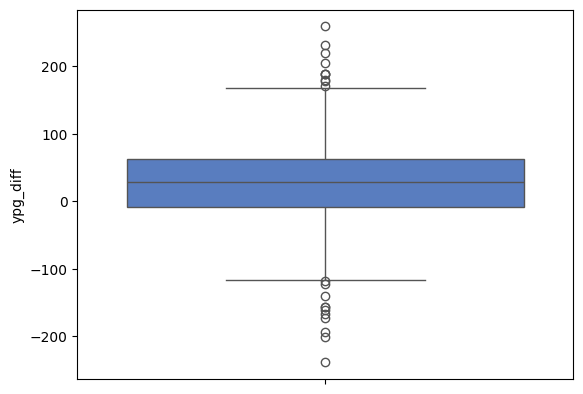

In [8]:
sns.boxplot(y=X_train['ypg_diff'], palette='muted')
plt.show()

By looking at these features, most of them contain **many** outliers. Thus, it is recommened to use robust scaling, which uses statistics that are robust to outliers such as the median and IQR.

A more common approach to scaling is to use standardization, however, this type of feature scaling is **not** robust to outliers as it uses statistics such as the mean and standard deviation which are most certainly affected by outliers.

In a later version, I may apply some data imputation to my outliers, but for now I will use both types of feature scaling techniques and evaluate the associated models.

# Feature Scaling

This step entails scaling both the training and test sets seperately. This prevents data leakage and avoids bias in performance metrics. 

For example, we do not want the parameters used in scaling the training set to leak into the test set, as our model in the future will be used on new data.

In [9]:
# Using RobustScaler
r_scaler = RobustScaler()
X_train_rs = r_scaler.fit_transform(X_train)
X_test_rs = r_scaler.transform(X_test)

# Using StandardScaler
s_scaler = StandardScaler()
X_train_ss = s_scaler.fit_transform(X_train)
X_test_ss = s_scaler.transform(X_test)


In [10]:
# Convert scaled data back into a DataFrame
X_train_rs_df =pd.DataFrame(X_train_rs, columns = X.columns)
X_test_rs_df =pd.DataFrame(X_test_rs, columns = X.columns)

X_train_ss_df = pd.DataFrame(X_train_ss, columns=X.columns)
X_test_ss_df =pd.DataFrame(X_test_ss, columns = X.columns)


In [11]:
X_train_rs_df.shape, X_test_rs_df.shape, X_train_ss_df.shape, X_test_ss_df.shape

((856, 15), (215, 15), (856, 15), (215, 15))

# Feature Selection

Using our scaled training and test sets for both the standard and robust scalers, we can undergo feature selection using the following:

In the following cells, I am running 5 different feature importannce techniques. 

    1. Recursive Feature Elimination
    2. Lasso 
    3. Random Forest
    4. Mutual Information
    5. ANOVA F-Value

For the first 3, I am grouping them together. I have a function *select_features* that applies the 3 feature importance techniques and sorts them in descending order of there importance. 

For the next 2 (4-5), it selects features based on mutual information and F_values.

In [12]:
def select_features(X, y):
    
    # 1.) Recursive Feature Elimination
    rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
    rfe_selector = rfe_selector.fit(X, y)
    rfe_support = rfe_selector.get_support()
    rfe_features = X.loc[:,rfe_support].columns.tolist()
    
    # 2.) Lasso
    lasso = Lasso(alpha=0.1)
    lasso.fit(X, y)
    lasso_support = lasso.coef_ != 0
    lasso_features = X.loc[:,lasso_support].columns.tolist()
    
    # 3.) Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X, y)
    rf_features = X.columns[rf.feature_importances_.argsort()[::-1][:10]].tolist()
    
    # Combine results
    feature_selection_df = pd.DataFrame({'Feature': X.columns,
                                         'RFE': rfe_support,
                                         'Lasso': lasso_support,
                                         'RF': rf.feature_importances_})
    
    # Count the methods that selected each feature
    feature_selection_df['Total'] = np.sum(feature_selection_df.iloc[:, 1:], axis=1)
    
    # Sort with the most important features (selected by most methods) on top
    feature_selection_df = feature_selection_df.sort_values('Total', ascending=False)
    
    return feature_selection_df

feature_importance_rs = select_features(X_train_rs_df, y_train)
feature_importance_ss = select_features(X_train_ss_df, y_train)

## 1.) Top 5: RFE, Lasso, Random Forest

Below I selected the top 5 most important features using the aforementioned feature selection technqiues. I selected the top 5 features using both the robust and standard scalers.

Based on the results, the only difference in the top 5 most important features is the 5th most important feature which was *fav_avg_mov* for the robust scaler and it was *ypg_diff* for the standard scaler.

In [13]:
# Sort features by 'Total' and select top n
top_5_features_rs = feature_importance_rs.sort_values('Total', ascending=False)['Feature'].head(5).tolist()

# Create a mask for the top 5 features
top_5_mask_rs = X_train_rs_df.columns.isin(top_5_features_rs)

# Selecting only top n features from training and test sets
X_train_rs_top5 = X_train_rs_df.loc[:, top_5_mask_rs]
X_test_rs_top5 = X_test_rs_df.loc[:, top_5_mask_rs]

X_train_rs_top5.columns

Index(['ppg_diff', 'ypg_diff', 'avg_mov_diff', 'team_ovr_diff', 'ppg_ratio'], dtype='object')

In [14]:
# Sort features by 'Total' and select top n
top_5_features_ss = feature_importance_ss.sort_values('Total', ascending=False)['Feature'].head(5).tolist()

# Create a mask for the top 5 features
top_5_mask_ss = X_train_ss_df.columns.isin(top_5_features_ss)

# Selecting only top n features from training and test sets
X_train_ss_top5 = X_train_ss_df.loc[:, top_5_mask_ss]
X_test_ss_top5 = X_test_ss_df.loc[:, top_5_mask_ss]

X_train_ss_top5.columns

Index(['ppg_diff', 'ypg_diff', 'avg_mov_diff', 'team_ovr_diff', 'ppg_ratio'], dtype='object')

## 2.) Mutual Information

I did the same as above. I selected the top 5 features based on the mutual classification metric for both the robust and standardized scaled training sets.

As we can see, some of the features in these two subsets are shared, but there are some differences.

In [15]:
# Robust Scaled Features

mi_sel = SelectKBest(mutual_info_classif, k=5)
mi_sel.fit(X_train_rs_df, y_train)

# Get the indices of the selected features
selected_feature_indices = mi_sel.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train_rs_df.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
X_train_rs_mi = pd.DataFrame(mi_sel.transform(X_train_rs_df), 
                                columns=selected_feature_names, 
                                index=X_train_rs_df.index)

X_test_rs_mi = pd.DataFrame(mi_sel.transform(X_test_rs_df),
                        columns=selected_feature_names,
                        index=X_test_rs_df.index)

X_train_rs_mi.columns

(Index(['fav_avg_mov', 'und_last_5_win_pct', 'ppg_diff', 'ppg_ratio',
        'ypg_ratio'],
       dtype='object'),
 Index(['fav_avg_mov', 'und_last_5_win_pct', 'ppg_diff', 'ppg_ratio',
        'ypg_ratio'],
       dtype='object'))

In [16]:
# Standard Scaled Features

mi_sel = SelectKBest(mutual_info_classif, k=5)
mi_sel.fit(X_train_ss_df, y_train)

# Get the indices of the selected features
selected_feature_indices = mi_sel.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train_ss_df.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
X_train_ss_mi = pd.DataFrame(mi_sel.transform(X_train_ss_df), 
                                columns=selected_feature_names, 
                                index=X_train_ss_df.index)

X_test_ss_mi = pd.DataFrame(mi_sel.transform(X_test_ss_df),
                        columns=selected_feature_names,
                        index=X_test_ss_df.index)

X_train_ss_mi.columns

Index(['fav_avg_mov', 'fav_win_pct', 'und_last_5_win_pct', 'ppg_diff',
       'ppg_ratio'],
      dtype='object')

## 3.) ANOVA

This uses analysis of variance to see which 5 features contribute most to the variability in our response.

Based on these results, the features for each subset based on each of the feature scaling techniques were no different.

In [17]:
# Robust Scaled Features

f_sel = SelectKBest(f_classif, k=5)
f_sel.fit(X_train_rs_df, y_train)

# Get the indices of the selected features
selected_feature_indices = f_sel.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train_rs_df.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
X_train_rs_f = pd.DataFrame(f_sel.transform(X_train_rs_df), 
                                columns=selected_feature_names, 
                                index=X_train_rs_df.index)

X_test_rs_f = pd.DataFrame(f_sel.transform(X_test_rs_df), 
                                columns=selected_feature_names, 
                                index=X_test_rs_df.index)

X_train_rs_f.columns

Index(['fav_win_pct', 'fav_last_5_win_pct', 'ppg_diff', 'ypg_diff',
       'ypg_ratio'],
      dtype='object')

In [18]:
# Standard Scaled Features

f_sel = SelectKBest(f_classif, k=5)
f_sel.fit(X_train_ss_df, y_train)

# Get the indices of the selected features
selected_feature_indices = f_sel.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = X_train_ss_df.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
X_train_ss_f = pd.DataFrame(f_sel.transform(X_train_ss_df), 
                                columns=selected_feature_names, 
                                index=X_train_ss_df.index)

X_test_ss_f = pd.DataFrame(f_sel.transform(X_test_ss_df), 
                                columns=selected_feature_names, 
                                index=X_test_ss_df.index)

X_train_ss_f.columns

Index(['fav_win_pct', 'fav_last_5_win_pct', 'ppg_diff', 'ypg_diff',
       'ypg_ratio'],
      dtype='object')

# Models

We will split this into 2 parts. One part for the robust scaled features and the standard scaled features.

In each section, we will train each model and evaluate its respective performance. The models are in the order:

    1. RFE, Lasso, Random Forest
    2. Mutual Information
    3. ANOVA

In [19]:
# Define models that require feature scaling
models = [
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    GaussianNB(),
    KNeighborsClassifier(),
    MLPClassifier(random_state=42)
]

## 1.) Robust Scaled Features

In [20]:
for model in models:    

    # Fit the model
    model.fit(X_train_rs_top5, y_train)
    
    # Predictions using test data
    y_pred = model.predict(X_test_rs_top5)
    
    # Evaluate the model
    print(f"\n{model.__class__.__name__} Results: (RFE, Lasso, Random Forest)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


LogisticRegression Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6511627906976745
Confusion Matrix:
 [[  0  72]
 [  3 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.66      0.98      0.79       143

    accuracy                           0.65       215
   macro avg       0.33      0.49      0.39       215
weighted avg       0.44      0.65      0.52       215


SVC Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results: (RFE, Lasso, Random Forest)
Accuracy

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


KNeighborsClassifier Results: (RFE, Lasso, Random Forest)
Accuracy: 0.5906976744186047
Confusion Matrix:
 [[ 16  56]
 [ 32 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.22      0.27        72
           1       0.66      0.78      0.72       143

    accuracy                           0.59       215
   macro avg       0.50      0.50      0.49       215
weighted avg       0.55      0.59      0.57       215


MLPClassifier Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6465116279069767
Confusion Matrix:
 [[  5  67]
 [  9 134]]
Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.07      0.12        72
           1       0.67      0.94      0.78       143

    accuracy                           0.65       215
   macro avg       0.51      0.50      0.45       215
weighted avg       0.56      0.65      0.56       215



/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
for model in models:

    model.fit(X_train_rs_mi, y_train)
    
    y_pred = model.predict(X_test_rs_mi)
    
    print(f"\n{model.__class__.__name__} Results (Mutual Information):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


LogisticRegression Results (Mutual Information):
Accuracy: 0.6558139534883721
Confusion Matrix:
 [[  0  72]
 [  2 141]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.66      0.99      0.79       143

    accuracy                           0.66       215
   macro avg       0.33      0.49      0.40       215
weighted avg       0.44      0.66      0.53       215


SVC Results (Mutual Information):
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results (Mutual Information):
Accuracy: 0.6558139534883721


/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
for model in models:    

    # Fit the model
    model.fit(X_train_rs_f, y_train)
    
    # Predictions using test data
    y_pred = model.predict(X_test_rs_f)
    
    # Evaluate the model
    print(f"\n{model.__class__.__name__} Results: (ANOVA)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


LogisticRegression Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6604651162790698
Confusion Matrix:
 [[  0  72]
 [  1 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.66      0.99      0.80       143

    accuracy                           0.66       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.66      0.53       215


SVC Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results: (RFE, Lasso, Random Forest)
Accuracy

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## 2.) Standard Scaled Features

In [23]:
for model in models:    

    # Fit the model
    model.fit(X_train_ss_top5, y_train)
    
    # Predictions using test data
    y_pred = model.predict(X_test_ss_top5)
    
    # Evaluate the model
    print(f"\n{model.__class__.__name__} Results: (RFE, Lasso, Random Forest)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


LogisticRegression Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6511627906976745
Confusion Matrix:
 [[  0  72]
 [  3 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.66      0.98      0.79       143

    accuracy                           0.65       215
   macro avg       0.33      0.49      0.39       215
weighted avg       0.44      0.65      0.52       215


SVC Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results: (RFE, Lasso, Random Forest)
Accuracy

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
for model in models:

    model.fit(X_train_ss_mi, y_train)
    
    y_pred = model.predict(X_test_ss_mi)
    
    print(f"\n{model.__class__.__name__} Results (Mutual Information):")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


LogisticRegression Results (Mutual Information):
Accuracy: 0.6697674418604651
Confusion Matrix:
 [[  1  71]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.01      0.03        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.83      0.51      0.41       215
weighted avg       0.78      0.67      0.54       215


SVC Results (Mutual Information):
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results (Mutual Information):
Accuracy: 0.6558139534883721


/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
for model in models:    

    # Fit the model
    model.fit(X_train_ss_f, y_train)
    
    # Predictions using test data
    y_pred = model.predict(X_test_ss_f)
    
    # Evaluate the model
    print(f"\n{model.__class__.__name__} Results: (ANOVA)")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f


LogisticRegression Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6604651162790698
Confusion Matrix:
 [[  0  72]
 [  1 142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.66      0.99      0.80       143

    accuracy                           0.66       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.66      0.53       215


SVC Results: (RFE, Lasso, Random Forest)
Accuracy: 0.6651162790697674
Confusion Matrix:
 [[  0  72]
 [  0 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.67      1.00      0.80       143

    accuracy                           0.67       215
   macro avg       0.33      0.50      0.40       215
weighted avg       0.44      0.67      0.53       215


GaussianNB Results: (RFE, Lasso, Random Forest)
Accuracy

/Users/epainter/Desktop/bet_model_v2/venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Model Selection

Based on models above we can see that none give us accuracy > 67% (historical NFL favorite win %) which means that these models are not better than guessing for if the favorite will win or not. Based on the performance metrics there are some considerable issues with precision, recall, and f-1 scores. I believe that there are several reasons for this, however the most glaring is that there is a major class imbalance between the 0 & 1 in both the training and test sets. 

Next steps would be use SMOTE, hyper parameter tuning, and a reconsideration of all of the steps above from feature transformation/scaling and selection to the types of methods used and even the types of models used.